In [366]:
import pandas as pd
import numpy as np


In [369]:
sms = pd.read_csv('SMSSpam.csv' ,delimiter=';',sep= ',')
sms = sms.replace('"','')
#print(sms.head(5))
sms[sms.columns[1:-1]]
sms_1 = sms.drop(sms.columns[1:-1], axis=1)
sms_1 = sms_1.drop(sms_1.columns[-1], axis=1)
sms_1.rename(columns={ sms_1.columns[0]: "i,type,message" }, inplace = True)
sms_1.shape
sms_1 [['index','category','message']] = sms_1["i,type,message"].str.split(',',2,expand=True)
sms_1 ['message']= sms_1.message.str.replace('"','')
sms_1



i,type,message index category  \
0     0,ham,"Go until jurong point, crazy.. Availabl...     0      ham   
1                   1,ham,Ok lar... Joking wif u oni...     1      ham   
2     2,spam,Free entry in 2 a wkly comp to win FA C...     2     spam   
3     3,ham,U dun say so early hor... U c already th...     3      ham   
4     4,ham,"Nah I don't think he goes to usf, he li...     4      ham   
...                                                 ...   ...      ...   
5560  5567,spam,"This is the 2nd time we have tried ...  5567     spam   
5561      5568,ham,Will ü b going to esplanade fr home?  5568      ham   
5562  5569,ham,"Pity, * was in mood for that. So...a...  5569      ham   
5563  5570,ham,The guy did some bitching but I acted...  5570      ham   
5564                5571,ham,Rofl. Its true to its name  5571      ham   

                                                message  
0     Go until jurong point, crazy.. Available only ...  
1                         Ok lar... Joking wif u oni...  
2     Free entry in 2 a wkly comp to win FA Cup fina...  
3     U dun say so early hor... U c already then say...  
4     Nah I don't think he goes to usf, he lives aro...  
...                                                 ...  
5560  This is the 2nd time we have tried 2 contact u...  
5561               Will ü b going to esplanade fr home?  
5562  Pity, * was in mood for that. So...any other s...  
5563  The guy did some bitching but I acted like i'd...  
5564                         Rofl. Its true to its name  

[5565 rows x 4 columns]

In [370]:
sms_1.groupby('category').count()

i,type,message  index  message
category                                                              
 give me a call if you've got a minute               1      1        0
DEVIOUSBITCH.ANYWAY                                  1      1        1
ham                                               4817   4817     4817
spam                                               746    746      746

In [371]:
found = sms_1[sms_1['category'].str.contains("give me a call if you've got a minute")]
found

i,type,message      index  \
5073  ham\tYeah, give me a call if you've got a minute  ham\tYeah   

                                    category message  
5073   give me a call if you've got a minute    None

In [372]:
found = sms_1[sms_1['category'].str.contains("DEVIOUSBITCH.ANYWAY")]
found

i,type,message  \
5074  ham\tHI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OU...   

                                                  index             category  \
5074  ham\tHI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OU...  DEVIOUSBITCH.ANYWAY   

         message  
5074  IL CALL U

In [373]:
streg_msg_1 = sms_1[sms_1.category == " give me a call if you've got a minute" ]
streg_msg_1 = streg_msg_1.drop(streg_msg_1.columns[1:4], axis=1)
streg_msg_1["index"] =0
#print(streg_msg_1)
streg_msg_1 [['category','message']] = streg_msg_1["i,type,message"].str.split('\t',expand=True)
streg_msg_1


i,type,message  index category  \
5073  ham\tYeah, give me a call if you've got a minute      0      ham   

                                          message  
5073  Yeah, give me a call if you've got a minute

In [374]:
streg_msg_2 = sms_1[sms_1.category == "DEVIOUSBITCH.ANYWAY" ]
streg_msg_2 = streg_msg_2.drop(streg_msg_2.columns[1:4], axis=1)
streg_msg_2["index"] =0
streg_msg_2 [['category','message']] = streg_msg_2["i,type,message"].str.split('\t',expand=True)

streg_msg_2

i,type,message  index category  \
5074  ham\tHI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OU...      0      ham   

                                                message  
5074  HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VIA...

In [375]:
new_data = sms_1.append(pd.DataFrame(data = streg_msg_1), ignore_index=True)
new_data = new_data.append(pd.DataFrame(data = streg_msg_2), ignore_index=True)

new_data.tail(2)

i,type,message index category  \
5565   ham\tYeah, give me a call if you've got a minute     0      ham   
5566  ham\tHI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OU...     0      ham   

                                                message  
5565        Yeah, give me a call if you've got a minute  
5566  HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VIA...

In [376]:
new_data = new_data.drop([5073,5074])
new_data = new_data.drop(new_data.columns[0:2], axis=1)
new_data

category                                            message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5562      ham  Pity, * was in mood for that. So...any other s...
5563      ham  The guy did some bitching but I acted like i'd...
5564      ham                         Rofl. Its true to its name
5565      ham        Yeah, give me a call if you've got a minute
5566      ham  HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VIA...

[5565 rows x 2 columns]

In [377]:
new_data.groupby('category').count()

message
category         
ham          4819
spam          746

In [378]:
new_data["message_lenght"] = new_data['message'].str.len()
print(new_data.message_lenght.describe())
#new_data

count    5565.000000
mean       76.808625
std        55.838590
min         0.000000
25%        34.000000
50%        58.000000
75%       116.000000
max       910.000000
Name: message_lenght, dtype: float64


In [379]:
new_data.groupby('category').mean()

message_lenght
category                
ham            67.257315
spam          138.508043

In [380]:
new_data.groupby('category').message_lenght.agg(['max','min'])

max  min
category          
ham       910    0
spam      223   13

In [293]:
new_data_max = new_data[(new_data.category == 'ham') & (new_data.message_lenght == 910) ]
new_data_max

category                                            message  \
1083      ham  For me the love should start with attraction.i...   

      message_lenght  
1083             910

In [294]:
new_data_max = new_data[(new_data.category == 'spam') & (new_data.message_lenght == 225) ]
new_data_max

Empty DataFrame
Columns: [category, message, message_lenght]
Index: []

1083    For me the love should start with attraction.i...
Name: message, dtype: object


array([<matplotlib.axes._subplots.AxesSubplot object at 0x125ead6a0>,
      dtype=object)

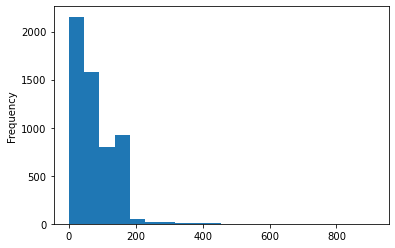

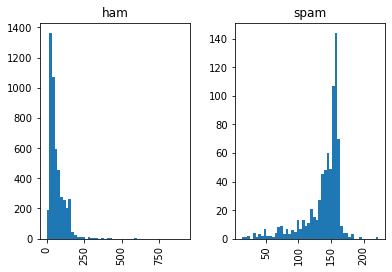

In [381]:
new_data.message_lenght.plot(bins=20, kind='hist')

print(new_data.message[new_data.message_lenght > 900])

new_data.hist(column='message_lenght', by='category', bins=50)

In [382]:
groups = new_data.groupby('category')
words=[]
for key, data in groups :
    print(key)
    words.append(data.message.str.split(expand=True).stack().value_counts())

ham
spam


In [267]:
words[0]

to         1457
you        1406
I          1398
the         981
a           948
           ... 
fml.          1
u..if         1
Flung         1
zyada         1
burning       1
Length: 11965, dtype: int64

In [296]:
words_ham = set(words[0].index)
words_spam= set(words[1].index)
commun = words_ham & words_spam
ham= words_ham - commun
spam = words_spam - commun

In [254]:
spamWords = words[1].loc[list(spam)]
spamWords = spamWords.sort_values(ascending=False)[spamWords>15]
spamWords

claim          73
STOP           45
won            45
prize          44
awarded        37
£1000          33
URGENT!        32
PO             31
Claim          30
150ppm         28
guaranteed     25
entry          25
4*             24
500            23
Box            23
16+            22
18             22
£100           22
Holiday        21
attempt        21
8007           21
Valid          20
£2000          20
weekly         20
tone           19
150p           19
GUARANTEED.    19
£5000          19
T&Cs           19
86688          19
WON            19
Orange         18
land           18
£500           18
750            18
landline.      17
tones          17
line.          17
WIN            17
£1.50          17
No:            17
ringtone       17
Expires        17
12hrs          17
PRIVATE!       16
Statement      16
Todays         16
prize.         16
NOW!           16
Identifier     16
Account        16
dtype: int64

In [265]:
for name in spamWords.index : 
    new_data[name]= new_data["message"].str.contains(name, case=False)
new_data.shape
new_data

(5565, 54)

In [269]:
from sklearn import preprocessing
new_data['message_lenght'] = preprocessing.scale(new_data['message_lenght'])
X = new_data.iloc[:,2:]
y = new_data['category']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [383]:
new_data

category                                            message  \
0         ham  Go until jurong point, crazy.. Available only ...   
1         ham                      Ok lar... Joking wif u oni...   
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3         ham  U dun say so early hor... U c already then say...   
4         ham  Nah I don't think he goes to usf, he lives aro...   
...       ...                                                ...   
5562      ham  Pity, * was in mood for that. So...any other s...   
5563      ham  The guy did some bitching but I acted like i'd...   
5564      ham                         Rofl. Its true to its name   
5565      ham        Yeah, give me a call if you've got a minute   
5566      ham  HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VIA...   

      message_lenght  
0                111  
1                 29  
2                155  
3                 49  
4                 61  
...              ...  
5562              57  
5563             125  
5564              26  
5565              43  
5566             151  

[5565 rows x 3 columns]

In [270]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [271]:
knn.score(X_test, y_test)

0.9640804597701149

In [272]:
pred = knn.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred))
print(knn.score(X_test,y_test))

print(new_data.shape)

[[1189    4]
 [  46  153]]
0.9640804597701149
(5565, 54)


In [384]:
tested_words=["hi mom","how are you","WINNER", "Credit",  "free"]

In [385]:
for name in tested_words : 
    new_data[name]= new_data["message"].str.contains(name, case=False)
new_data.shape
new_data

category                                            message  \
0         ham  Go until jurong point, crazy.. Available only ...   
1         ham                      Ok lar... Joking wif u oni...   
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3         ham  U dun say so early hor... U c already then say...   
4         ham  Nah I don't think he goes to usf, he lives aro...   
...       ...                                                ...   
5562      ham  Pity, * was in mood for that. So...any other s...   
5563      ham  The guy did some bitching but I acted like i'd...   
5564      ham                         Rofl. Its true to its name   
5565      ham        Yeah, give me a call if you've got a minute   
5566      ham  HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VIA...   

      message_lenght  hi mom  how are you  WINNER  Credit   free  
0                111   False        False   False   False  False  
1                 29   False        False   False   False  False  
2                155   False        False   False   False   True  
3                 49   False        False   False   False  False  
4                 61   False        False   False   False  False  
...              ...     ...          ...     ...     ...    ...  
5562              57   False        False   False   False  False  
5563             125   False        False   False   False   True  
5564              26   False        False   False   False  False  
5565              43   False        False   False   False  False  
5566             151   False        False   False   False  False  

[5565 rows x 8 columns]

In [386]:
from sklearn import preprocessing
new_data['message_lenght'] = preprocessing.scale(new_data['message_lenght'])
X = new_data.iloc[:,2:]
y = new_data['category']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [387]:
new_data

category                                            message  \
0         ham  Go until jurong point, crazy.. Available only ...   
1         ham                      Ok lar... Joking wif u oni...   
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3         ham  U dun say so early hor... U c already then say...   
4         ham  Nah I don't think he goes to usf, he lives aro...   
...       ...                                                ...   
5562      ham  Pity, * was in mood for that. So...any other s...   
5563      ham  The guy did some bitching but I acted like i'd...   
5564      ham                         Rofl. Its true to its name   
5565      ham        Yeah, give me a call if you've got a minute   
5566      ham  HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VIA...   

      message_lenght  hi mom  how are you  WINNER  Credit   free  
0           0.612380   False        False   False   False  False  
1          -0.856270   False        False   False   False  False  
2           1.400437   False        False   False   False   True  
3          -0.498063   False        False   False   False  False  
4          -0.283138   False        False   False   False  False  
...              ...     ...          ...     ...     ...    ...  
5562       -0.354780   False        False   False   False  False  
5563        0.863125   False        False   False   False   True  
5564       -0.910001   False        False   False   False  False  
5565       -0.605525   False        False   False   False  False  
5566        1.328795   False        False   False   False  False  

[5565 rows x 8 columns]

In [327]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [314]:
knn.score(X_test, y_test)

0.9022988505747126

In [315]:
pred = knn.predict(X_test)
from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred))
print(knn.score(X_test,y_test))

print(new_data.shape)

[[1148   45]
 [  91  108]]
0.9022988505747126
(5565, 8)


In [323]:
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
scaler = preprocessing.MinMaxScaler()
X = new_data.iloc[:,2:]
X_scale = scaler.fit_transform(X)
knn = KNeighborsClassifier()
k_range = range(1, 15)
param_grid = {'n_neighbors' : k_range ,
 'p' : (1,2,3),
 'weights' : ('uniform','distance'),
 'metric' : ('minkowski', 'chebyshev'),
 }
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_scale, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': range(1, 15), 'p': (1, 2, 3),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [324]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=6, p=1)

In [325]:
grid.best_score_

0.9029629438280613

In [388]:

dicted1 = {"message_lenght": [1.400437],"hi mom": [False],"how are you": [False], "WINNER": [False],"Credit": [False], "free": [True]}
dicted2 = {"message_lenght": [0.612380],"hi mom": [False],"how are you": [False], "WINNER": [False],"Credit": [False], "free": [False]}
case1 = pd.DataFrame(data=dicted1)
case2 = pd.DataFrame(data=dicted2)
case2.head()

message_lenght  hi mom  how are you  WINNER  Credit   free
0         0.61238   False        False   False   False  False

In [389]:
knn.predict(case1)

array(['spam'], dtype=object)

In [390]:
knn.predict(case2)

array(['ham'], dtype=object)

In [391]:
knn.predict_proba(case1)

array([[0., 1.]])

In [392]:
knn.predict_proba(case2)

array([[0.71428571, 0.28571429]])